In [279]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [280]:
import seaborn as sns
pd.set_option("display.max_columns",None)

### Reading and cleaning the data set


In [281]:
data = pd.read_csv('/content/sample_data/data_menage.csv')



In [282]:
data.drop_duplicates(subset=['CD_SECTOR'],inplace=True)
data.shape

(19821, 16)

In [283]:
data.head()

Unnamed: 0  CD_REFNIS  CD_SECTOR  TOTAL Total ménages privés  \
0           0      11001  11001A00-   1153                 1152   
1           1      11001  11001A01-   1178                 1178   
2           2      11001  11001A020    273                  273   
3           3      11001  11001A030    178                  178   
4           4      11001  11001A042    135                  135   

  Ménage 1 personne Ménage 2 personnes Ménage 3 personnes Ménage 4 personnes  \
0               414                418                142                117   
1               298                454                164                171   
2                52                101                 43                 57   
3                42                 70                 21                 26   
4                25                 60                 19                 17   

  Ménage 5 personnes et plus Taille non-definie*  TX_DESCR_SECTOR_NL  \
0                         52                  10  AARTSELAAR-CENTRUM   
1                         73                  18        DE LEEUWERIK   
2                          *                   *           BUERSTEDE   
3                         13                   6            YSSELAAR   
4                          *                   *       KLEINE GRIPPE   

   TX_DESCR_SECTOR_FR TX_DESCR_NL TX_DESCR_FR  Moy pers par menages  
0  AARTSELAAR-CENTRUM  Aartselaar  Aartselaar              2.086806  
1        DE LEEUWERIK  Aartselaar  Aartselaar              2.331919  
2           BUERSTEDE  Aartselaar  Aartselaar              2.238095  
3            YSSELAAR  Aartselaar  Aartselaar              2.325843  
4       KLEINE GRIPPE  Aartselaar  Aartselaar              2.000000

In [284]:
data.shape

(19821, 16)

In [285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
df = pd.read_excel(
   '/content/sample_data/TF_PSNL_INC_TAX_SECTOR.xlsx',
   sheet_name='TF_PSNL_INC_TAX_SECTOR',
    )


In [287]:
df.drop_duplicates(subset=['CD_SECTOR'],inplace=True)
df.shape

(20146, 12)

In [288]:
df.shape

(20146, 12)

In [289]:
df['MS_AVG_TOT_NET_TAXABLE_INC'].replace("",np.NaN,inplace=True)

In [290]:
# traitement des données manquantes
mean=df['MS_AVG_TOT_NET_TAXABLE_INC'].mean()
df['MS_AVG_TOT_NET_TAXABLE_INC'].fillna(mean,inplace=True)


In [291]:
df.head()

CD_YEAR  CD_MUNTY_REFNIS  CD_SECTOR  MS_NBR_NON_ZERO_INC  \
0     2005            11001  11001A00-                 1203   
1     2005            11001  11001A01-                 1509   
2     2005            11001  11001A020                  449   
3     2005            11001  11001A030                  245   
4     2005            11001  11001A042                  204   

   MS_TOT_NET_TAXABLE_INC  MS_AVG_TOT_NET_TAXABLE_INC  \
0             34861255.99                     28979.0   
1             52985912.47                     35113.0   
2             16851901.45                     37532.0   
3              7074667.86                     28876.0   
4             12979299.65                     63624.0   

   MS_MEDIAN_NET_TAXABLE_INC  MS_INT_QUART_DIFF  MS_INT_QUART_COEFF  \
0                    21962.0            21856.0               100.0   
1                    25261.0            28117.0               111.0   
2                    25591.0            32363.0               126.0   
3                    22651.0            24246.0               107.0   
4                    28844.0            40705.0               141.0   

   MS_INT_QUART_ASSYM  TX_SECTOR_DESCR_NL  TX_SECTOR_DESCR_FR  
0                22.0  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM  
1                31.0        DE LEEUWERIK        DE LEEUWERIK  
2                35.0           BUERSTEDE           BUERSTEDE  
3                27.0            YSSELAAR            YSSELAAR  
4                39.0       KLEINE GRIPPE       KLEINE GRIPPE

In [292]:
df['MS_AVG_TOT_NET_TAXABLE_INC'].isnull().sum()

0

In [293]:
#Renomons la colonne average income

df.rename(columns={'MS_AVG_TOT_NET_TAXABLE_INC':'Avg_income'},inplace=True)
df.head()

CD_YEAR  CD_MUNTY_REFNIS  CD_SECTOR  MS_NBR_NON_ZERO_INC  \
0     2005            11001  11001A00-                 1203   
1     2005            11001  11001A01-                 1509   
2     2005            11001  11001A020                  449   
3     2005            11001  11001A030                  245   
4     2005            11001  11001A042                  204   

   MS_TOT_NET_TAXABLE_INC  Avg_income  MS_MEDIAN_NET_TAXABLE_INC  \
0             34861255.99     28979.0                    21962.0   
1             52985912.47     35113.0                    25261.0   
2             16851901.45     37532.0                    25591.0   
3              7074667.86     28876.0                    22651.0   
4             12979299.65     63624.0                    28844.0   

   MS_INT_QUART_DIFF  MS_INT_QUART_COEFF  MS_INT_QUART_ASSYM  \
0            21856.0               100.0                22.0   
1            28117.0               111.0                31.0   
2            32363.0               126.0                35.0   
3            24246.0               107.0                27.0   
4            40705.0               141.0                39.0   

   TX_SECTOR_DESCR_NL  TX_SECTOR_DESCR_FR  
0  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM  
1        DE LEEUWERIK        DE LEEUWERIK  
2           BUERSTEDE           BUERSTEDE  
3            YSSELAAR            YSSELAAR  
4       KLEINE GRIPPE       KLEINE GRIPPE

In [294]:
df['CD_SECTOR'].isna().sum()

0

In [295]:
#merge by CD-SECTOR

d=pd.merge(data, df, on='CD_SECTOR',  how='inner')
d.head()

Unnamed: 0  CD_REFNIS  CD_SECTOR  TOTAL Total ménages privés  \
0           0      11001  11001A00-   1153                 1152   
1           1      11001  11001A01-   1178                 1178   
2           2      11001  11001A020    273                  273   
3           3      11001  11001A030    178                  178   
4           4      11001  11001A042    135                  135   

  Ménage 1 personne Ménage 2 personnes Ménage 3 personnes Ménage 4 personnes  \
0               414                418                142                117   
1               298                454                164                171   
2                52                101                 43                 57   
3                42                 70                 21                 26   
4                25                 60                 19                 17   

  Ménage 5 personnes et plus Taille non-definie*  TX_DESCR_SECTOR_NL  \
0                         52                  10  AARTSELAAR-CENTRUM   
1                         73                  18        DE LEEUWERIK   
2                          *                   *           BUERSTEDE   
3                         13                   6            YSSELAAR   
4                          *                   *       KLEINE GRIPPE   

   TX_DESCR_SECTOR_FR TX_DESCR_NL TX_DESCR_FR  Moy pers par menages  CD_YEAR  \
0  AARTSELAAR-CENTRUM  Aartselaar  Aartselaar              2.086806     2005   
1        DE LEEUWERIK  Aartselaar  Aartselaar              2.331919     2005   
2           BUERSTEDE  Aartselaar  Aartselaar              2.238095     2005   
3            YSSELAAR  Aartselaar  Aartselaar              2.325843     2005   
4       KLEINE GRIPPE  Aartselaar  Aartselaar              2.000000     2005   

   CD_MUNTY_REFNIS  MS_NBR_NON_ZERO_INC  MS_TOT_NET_TAXABLE_INC  Avg_income  \
0            11001                 1203             34861255.99     28979.0   
1            11001                 1509             52985912.47     35113.0   
2            11001                  449             16851901.45     37532.0   
3            11001                  245              7074667.86     28876.0   
4            11001                  204             12979299.65     63624.0   

   MS_MEDIAN_NET_TAXABLE_INC  MS_INT_QUART_DIFF  MS_INT_QUART_COEFF  \
0                    21962.0            21856.0               100.0   
1                    25261.0            28117.0               111.0   
2                    25591.0            32363.0               126.0   
3                    22651.0            24246.0               107.0   
4                    28844.0            40705.0               141.0   

   MS_INT_QUART_ASSYM  TX_SECTOR_DESCR_NL  TX_SECTOR_DESCR_FR  
0                22.0  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM  
1                31.0        DE LEEUWERIK        DE LEEUWERIK  
2                35.0           BUERSTEDE           BUERSTEDE  
3                27.0            YSSELAAR            YSSELAAR  
4                39.0       KLEINE GRIPPE       KLEINE GRIPPE

In [296]:
d.shape

(19818, 27)

In [297]:
dat = pd.read_excel(
   '/content/sample_data/statbel_sector_fiscal_2017_V3_20200613_YPE.xlsx',
   sheet_name='Segment_David',
    )

In [298]:
#data.head()
data.shape

(19821, 16)

In [299]:
dat.head()
#df.shape
#df['CD_SECTOR'].unique().shape


CD_SECTOR  POPULATION DT_STRT_SECTOR       DT_STOP_SECTOR  \
0  25005A001         897     1981-03-01  9999-12-31 00:00:00   
1  25005A012         266     1981-03-01  9999-12-31 00:00:00   
2  25005A090          48     1981-03-01  9999-12-31 00:00:00   
3  25005A10-         886     1981-03-01  9999-12-31 00:00:00   
4  25005A190          61     1981-03-01  9999-12-31 00:00:00   

   OPPERVLAKKTE IN HM²           TX_DESCR_SECTOR_NL  CD_REFNIS  \
0           127.694606           BEAUVECHAIN-CENTRE      25005   
1            51.528353                 LES BURETTES      25005   
2           607.287990  BEAUVECHAIN-HAB. DISPERSEES      25005   
3           104.613730            LA BRUYERE-CENTRE      25005   
4           366.454884   LA BRUYERE-HAB. DISPERSEES      25005   

            TX_DESCR_SECTOR_FR TX_DESCR_NL  TX_DESCR_FR Wal?   density  \
0           BEAUVECHAIN-CENTRE     Bevekom  Beauvechain  Wal  7.024572   
1                 LES BURETTES     Bevekom  Beauvechain  Wal  5.162207   
2  BEAUVECHAIN-HAB. DISPERSEES     Bevekom  Beauvechain  Wal  0.079040   
3            LA BRUYERE-CENTRE     Bevekom  Beauvechain  Wal  8.469252   
4   LA BRUYERE-HAB. DISPERSEES     Bevekom  Beauvechain  Wal  0.166460   

     Avg_income Segment  
0  29915.196461   Rural  
1      0.000000   Rural  
2      0.000000   Ferme  
3  24972.538074   Rural  
4      0.000000   Ferme

In [300]:
dat.shape

(9875, 14)

In [301]:
#merge final
da=pd.merge(d, dat, on='CD_SECTOR',  how='inner')
#da.head()
#da.tail()
#dat.tail()


In [302]:
da.shape
#dat.shape

(9665, 40)

In [303]:
da.head()

Unnamed: 0  CD_REFNIS_x  CD_SECTOR  TOTAL Total ménages privés  \
0        4484        25005  25005A001    353                  353   
1        4485        25005  25005A012    109                  109   
2        4486        25005  25005A090     15                   15   
3        4487        25005  25005A10-    344                  344   
4        4488        25005  25005A190     20                   19   

  Ménage 1 personne Ménage 2 personnes Ménage 3 personnes Ménage 4 personnes  \
0                91                117                 55                 53   
1                27                 35                 20                 18   
2                 5                  *                  3                  4   
3                90                114                 53                 54   
4                 5                  4                  6                  *   

  Ménage 5 personnes et plus Taille non-definie*         TX_DESCR_SECTOR_NL_x  \
0                         32                   5           BEAUVECHAIN-CENTRE   
1                          6                   3                 LES BURETTES   
2                          *                   *  BEAUVECHAIN-HAB. DISPERSEES   
3                         29                   4            LA BRUYERE-CENTRE   
4                          *                   *   LA BRUYERE-HAB. DISPERSEES   

          TX_DESCR_SECTOR_FR_x TX_DESCR_NL_x TX_DESCR_FR_x  \
0           BEAUVECHAIN-CENTRE       Bevekom   Beauvechain   
1                 LES BURETTES       Bevekom   Beauvechain   
2  BEAUVECHAIN-HAB. DISPERSEES       Bevekom   Beauvechain   
3            LA BRUYERE-CENTRE       Bevekom   Beauvechain   
4   LA BRUYERE-HAB. DISPERSEES       Bevekom   Beauvechain   

   Moy pers par menages  CD_YEAR  CD_MUNTY_REFNIS  MS_NBR_NON_ZERO_INC  \
0              2.441926     2005            25005                  455   
1              2.376147     2005            25005                  127   
2              2.000000     2005            25005                   15   
3              2.436047     2005            25005                  488   
4              1.631579     2008            25005                   16   

   MS_TOT_NET_TAXABLE_INC  Avg_income_x  MS_MEDIAN_NET_TAXABLE_INC  \
0             13611414.39  29915.000000                    21029.0   
1                     NaN  25284.455548                    18235.0   
2                     NaN  25284.455548                        NaN   
3             12186598.58  24973.000000                    21172.0   
4                     NaN  25284.455548                        NaN   

   MS_INT_QUART_DIFF  MS_INT_QUART_COEFF  MS_INT_QUART_ASSYM  \
0            27126.0               129.0                23.0   
1            26718.0               147.0                36.0   
2                NaN                 NaN                 NaN   
3            19598.0                93.0                 5.0   
4                NaN                 NaN                 NaN   

            TX_SECTOR_DESCR_NL           TX_SECTOR_DESCR_FR  POPULATION  \
0           BEAUVECHAIN-CENTRE           BEAUVECHAIN-CENTRE         897   
1                 LES BURETTES                 LES BURETTES         266   
2  BEAUVECHAIN-HAB. DISPERSEES  BEAUVECHAIN-HAB. DISPERSEES          48   
3            LA BRUYERE-CENTRE            LA BRUYERE-CENTRE         886   
4   LA BRUYERE-HAB. DISPERSEES   LA BRUYERE-HAB. DISPERSEES          61   

  DT_STRT_SECTOR       DT_STOP_SECTOR  OPPERVLAKKTE IN HM²  \
0     1981-03-01  9999-12-31 00:00:00           127.694606   
1     1981-03-01  9999-12-31 00:00:00            51.528353   
2     1981-03-01  9999-12-31 00:00:00           607.287990   
3     1981-03-01  9999-12-31 00:00:00           104.613730   
4     1981-03-01  9999-12-31 00:00:00           366.454884   

          TX_DESCR_SECTOR_NL_y  CD_REFNIS_y         TX_DESCR_SECTOR_FR_y  \
0           BEAUVECHAIN-CENTRE        25005           BEAUVECHAIN-CENTRE   
1                 LE

In [304]:

#da=da.dropna(subset=['POPULATION','DT_STRT_SECTOR','DT_STOP_SECTOR','OPPERVLAKKTE IN HM²','TX_DESCR_SECTOR_NL_y','CD_REFNIS_y','TX_DESCR_SECTOR_FR_y','TX_DESCR_NL_y','TX_DESCR_FR_y','Wal?','density','Avg_income_y','Segment'])

#da.head()
#da.tail()

In [305]:
#df['Segment']=dat['Segment']
#df['density']=dat['density']
#df.head()

In [306]:
#df = pd.read_excel(
 #  'statbel.xlsx',
  # sheet_name='Segment_David',
  #  )

In [307]:
#df = pd.read_csv('dataNew.csv')

In [308]:
#data_2 = pd.merge(data, df, on='CD_SECTOR',  how='left')
data_2=da

In [309]:
data_2.head()

Unnamed: 0  CD_REFNIS_x  CD_SECTOR  TOTAL Total ménages privés  \
0        4484        25005  25005A001    353                  353   
1        4485        25005  25005A012    109                  109   
2        4486        25005  25005A090     15                   15   
3        4487        25005  25005A10-    344                  344   
4        4488        25005  25005A190     20                   19   

  Ménage 1 personne Ménage 2 personnes Ménage 3 personnes Ménage 4 personnes  \
0                91                117                 55                 53   
1                27                 35                 20                 18   
2                 5                  *                  3                  4   
3                90                114                 53                 54   
4                 5                  4                  6                  *   

  Ménage 5 personnes et plus Taille non-definie*         TX_DESCR_SECTOR_NL_x  \
0                         32                   5           BEAUVECHAIN-CENTRE   
1                          6                   3                 LES BURETTES   
2                          *                   *  BEAUVECHAIN-HAB. DISPERSEES   
3                         29                   4            LA BRUYERE-CENTRE   
4                          *                   *   LA BRUYERE-HAB. DISPERSEES   

          TX_DESCR_SECTOR_FR_x TX_DESCR_NL_x TX_DESCR_FR_x  \
0           BEAUVECHAIN-CENTRE       Bevekom   Beauvechain   
1                 LES BURETTES       Bevekom   Beauvechain   
2  BEAUVECHAIN-HAB. DISPERSEES       Bevekom   Beauvechain   
3            LA BRUYERE-CENTRE       Bevekom   Beauvechain   
4   LA BRUYERE-HAB. DISPERSEES       Bevekom   Beauvechain   

   Moy pers par menages  CD_YEAR  CD_MUNTY_REFNIS  MS_NBR_NON_ZERO_INC  \
0              2.441926     2005            25005                  455   
1              2.376147     2005            25005                  127   
2              2.000000     2005            25005                   15   
3              2.436047     2005            25005                  488   
4              1.631579     2008            25005                   16   

   MS_TOT_NET_TAXABLE_INC  Avg_income_x  MS_MEDIAN_NET_TAXABLE_INC  \
0             13611414.39  29915.000000                    21029.0   
1                     NaN  25284.455548                    18235.0   
2                     NaN  25284.455548                        NaN   
3             12186598.58  24973.000000                    21172.0   
4                     NaN  25284.455548                        NaN   

   MS_INT_QUART_DIFF  MS_INT_QUART_COEFF  MS_INT_QUART_ASSYM  \
0            27126.0               129.0                23.0   
1            26718.0               147.0                36.0   
2                NaN                 NaN                 NaN   
3            19598.0                93.0                 5.0   
4                NaN                 NaN                 NaN   

            TX_SECTOR_DESCR_NL           TX_SECTOR_DESCR_FR  POPULATION  \
0           BEAUVECHAIN-CENTRE           BEAUVECHAIN-CENTRE         897   
1                 LES BURETTES                 LES BURETTES         266   
2  BEAUVECHAIN-HAB. DISPERSEES  BEAUVECHAIN-HAB. DISPERSEES          48   
3            LA BRUYERE-CENTRE            LA BRUYERE-CENTRE         886   
4   LA BRUYERE-HAB. DISPERSEES   LA BRUYERE-HAB. DISPERSEES          61   

  DT_STRT_SECTOR       DT_STOP_SECTOR  OPPERVLAKKTE IN HM²  \
0     1981-03-01  9999-12-31 00:00:00           127.694606   
1     1981-03-01  9999-12-31 00:00:00            51.528353   
2     1981-03-01  9999-12-31 00:00:00           607.287990   
3     1981-03-01  9999-12-31 00:00:00           104.613730   
4     1981-03-01  9999-12-31 00:00:00           366.454884   

          TX_DESCR_SECTOR_NL_y  CD_REFNIS_y         TX_DESCR_SECTOR_FR_y  \
0           BEAUVECHAIN-CENTRE        25005           BEAUVECHAIN-CENTRE   
1                 LE

In [310]:
data_2.dropna(axis = 0, subset=['Segment'],inplace=True)

In [311]:
data_2['Avg_income']=data_2['Avg_income_x']

In [312]:
data_interest = data_2[['Moy pers par menages','density','Avg_income']]
data_interest.index = data_2.CD_SECTOR
data_interest.head()

Moy pers par menages   density    Avg_income
CD_SECTOR                                              
25005A001              2.441926  7.024572  29915.000000
25005A012              2.376147  5.162207  25284.455548
25005A090              2.000000  0.079040  25284.455548
25005A10-              2.436047  8.469252  24973.000000
25005A190              1.631579  0.166460  25284.455548

In [313]:
# Transformation en logarithme
data_interest['density']=np.log(data_interest['density']+0.001)
data_interest['Avg_income']=np.log(data_interest['Avg_income']+0.001)

data_interest.head()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Moy pers par menages   density  Avg_income
CD_SECTOR                                            
25005A001              2.441926  1.949557   10.306115
25005A012              2.376147  1.641558   10.137945
25005A090              2.000000 -2.525230   10.137945
25005A10-              2.436047  2.136560   10.125551
25005A190              1.631579 -1.787012   10.137945

### clustering based on density and avg_income

In [314]:
from sklearn.preprocessing import StandardScaler
X = data_interest.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [315]:
Clus_dataSet=X

In [316]:
wccs = []
for i in range(1,11):
  k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12,random_state=10)
  k_means.fit(Clus_dataSet)
  wccs.append(k_means.inertia_)

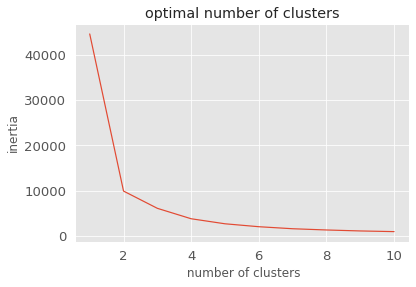

<Figure size 432x288 with 0 Axes>

In [317]:
plt.plot(range(1,11),wccs)
plt.title("optimal number of clusters")
plt.xlabel(" number of clusters")
plt.ylabel("inertia")
plt.show()
plt.savefig("elbow technique 2 features")

### Exploring optimal clusters number through silhouette scoring

In [318]:
from sklearn.metrics import  silhouette_samples, silhouette_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWa

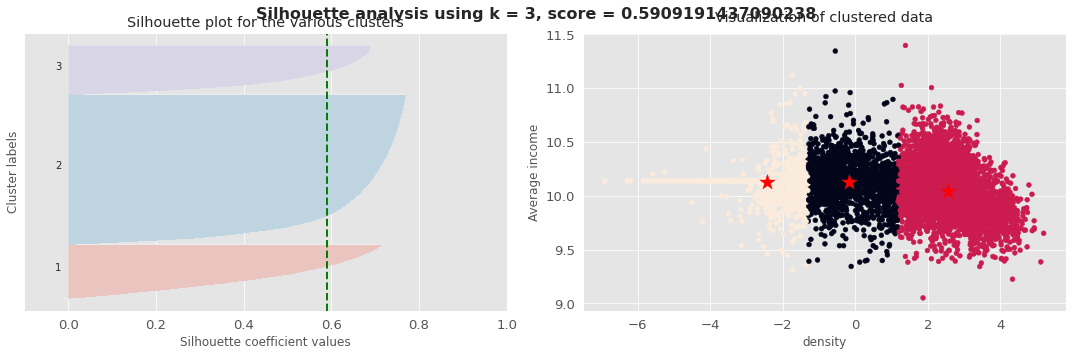

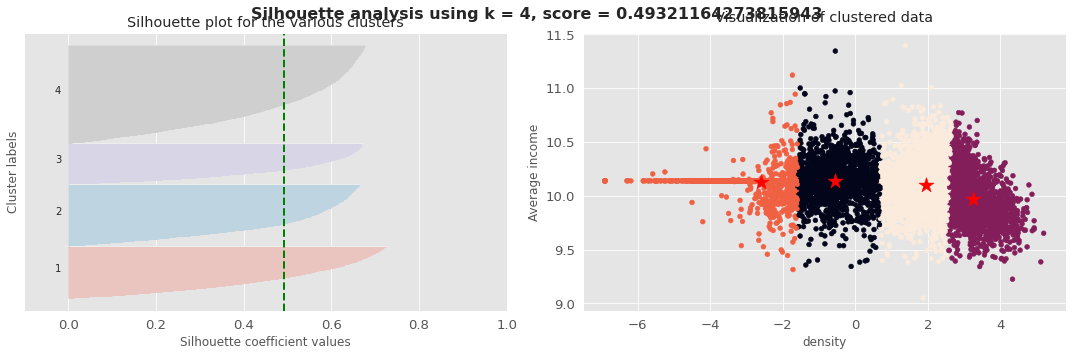

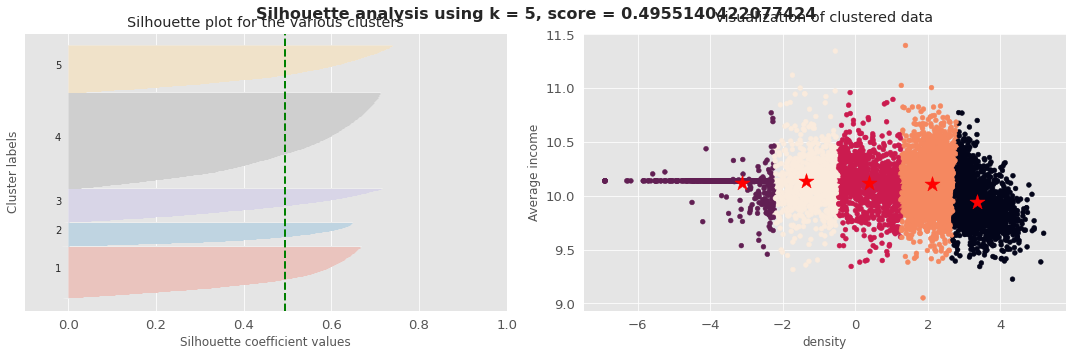

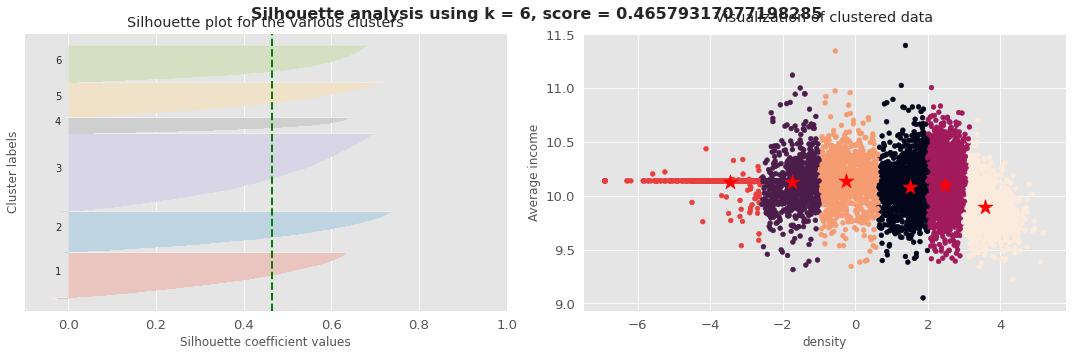

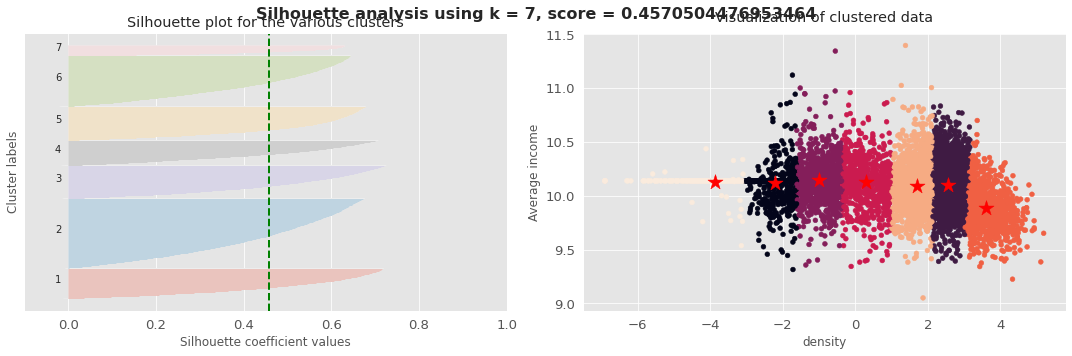

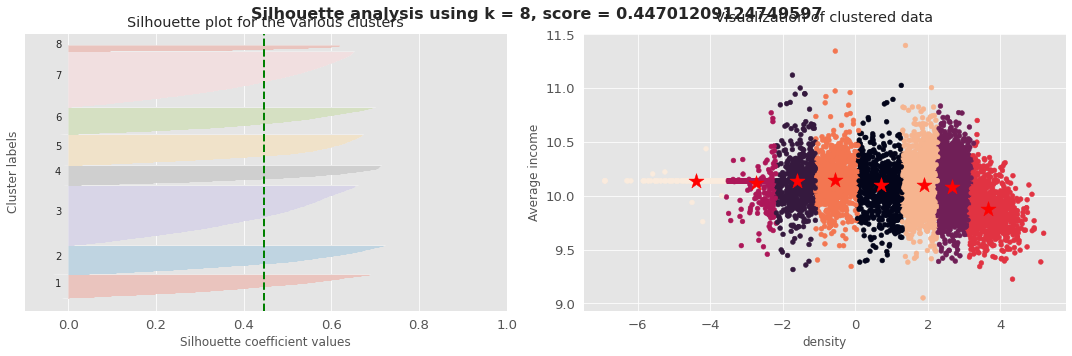

In [319]:
for i,k in enumerate(range(3,9)):
  fig,ax = plt.subplots(1,2,figsize = (15,5))

  k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12,random_state=10)
  k_means.fit(Clus_dataSet)
  y_predict = k_means.labels_
  centroids = k_means.cluster_centers_
  data_interest['Test_cluster'] = y_predict
  centroids_df = data_interest.groupby('Test_cluster')['density','Avg_income'].mean()
  centroids_density = list(centroids_df['density'])
  centroids_income = list(centroids_df['Avg_income'])


  silhouette_vals = silhouette_samples(Clus_dataSet,y_predict)

  y_ticks = []
  y_lower = y_upper = 0
  for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax[0].barh(range(y_lower,y_upper),cluster_silhouette_vals,height=1)
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

  avg_score = np.mean(silhouette_vals)
  ax[0].axvline(avg_score, linestyle='--',linewidth=2,color='green')
  ax[0].set_yticks([])
  ax[0].set_xlim([-0.1,1])
  ax[0].set_xlabel('Silhouette coefficient values')
  ax[0].set_ylabel('Cluster labels')
  ax[0].set_title('Silhouette plot for the various clusters')

  ax[1].scatter(data_interest['density'],data_interest['Avg_income'],c=y_predict)
  ax[1].scatter(centroids_density,centroids_income,marker = '*',c='r',s=250)
  ax[1].set_xlabel('density')
  ax[1].set_ylabel('Average income')
  ax[1].set_title('Visualization of clustered data',y = 1.02)

  plt.tight_layout()
  plt.suptitle(f'Silhouette analysis using k = {k}, score = {avg_score}',fontsize = 16,fontweight='semibold')
  plt.savefig(f'Silhouettte_analysis_{k}.jpg')
  plt.show





  



In [320]:
data_interest.head()

Moy pers par menages   density  Avg_income  Test_cluster
CD_SECTOR                                                          
25005A001              2.441926  1.949557   10.306115             6
25005A012              2.376147  1.641558   10.137945             6
25005A090              2.000000 -2.525230   10.137945             3
25005A10-              2.436047  2.136560   10.125551             6
25005A190              1.631579 -1.787012   10.137945             1

In [321]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[2 2 3 ... 2 1 3]


In [322]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.24657327,  9.96728862],
       [-0.56743473, 10.13975834],
       [ 1.93435055, 10.102876  ],
       [-2.61312611, 10.12283344]])

In [323]:
data_interest['cluster'] = labels
data_interest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Moy pers par menages   density  Avg_income  Test_cluster  cluster
CD_SECTOR                                                                   
25005A001              2.441926  1.949557   10.306115             6        2
25005A012              2.376147  1.641558   10.137945             6        2
25005A090              2.000000 -2.525230   10.137945             3        3
25005A10-              2.436047  2.136560   10.125551             6        2
25005A190              1.631579 -1.787012   10.137945             1        3

In [324]:
sns.set_style('darkgrid')
sns.set_context( 'paper',font_scale=1.5)
plt.style.use('ggplot')

In [325]:
#plt.figure(figsize=(15,15))

#ax = sns.scatterplot(data=data_interest.iloc[1:1000],x='density',y = 'Avg_income',hue='cluster'
 #                 ,palette = 'Set1')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.show()

In [326]:
centroids = data_2.groupby('Segment')['density','Avg_income'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [327]:
centroids

density    Avg_income
Segment                                  
Ferme              0.155143  25287.046770
Immeubles         88.195808  17880.717172
Péri-urbain        5.897781  38119.562893
Rural              5.803751  24186.909007
Urbain Centre     17.812261  36956.631579
Urbain populaire  26.913569  21679.128775

In [328]:
initial_centers = []

In [329]:
for i,row in centroids.iterrows():
  center = [row['density'],row['Avg_income']]
  initial_centers.append(center)
initial_centers

[[0.15514252422755828, 25287.04676989329],
 [88.19580802126876, 17880.717171717173],
 [5.89778125070497, 38119.56289308176],
 [5.803751383926732, 24186.90900696478],
 [17.8122608488246, 36956.63157894737],
 [26.913568951000823, 21679.128775398825]]

In [330]:
center = np.asarray(initial_centers)
center.shape

(6, 2)

In [331]:
#clusterNum = 6
#k_means = KMeans(init = center, n_clusters = clusterNum, n_init = 12)
#k_means.fit(X)
#labels = k_means.labels_

In [332]:
#data_interest['cluster_6'] = labels
#data_interest.head()

In [333]:
#plt.figure(figsize=(8,8))

#ax = sns.scatterplot(data=data_interest.iloc[1:1000],x='density',y = 'Avg_income',hue='cluster_6'
 #                 ,palette = 'Set1')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.show()

### clustering based on density, avg_income and avg family members

In [334]:
data_interest.head()

Moy pers par menages   density  Avg_income  Test_cluster  cluster
CD_SECTOR                                                                   
25005A001              2.441926  1.949557   10.306115             6        2
25005A012              2.376147  1.641558   10.137945             6        2
25005A090              2.000000 -2.525230   10.137945             3        3
25005A10-              2.436047  2.136560   10.125551             6        2
25005A190              1.631579 -1.787012   10.137945             1        3

In [335]:
data_interest.groupby('Test_cluster')['Test_cluster'].count()

Test_cluster
0     899
1    1128
2    2310
3     759
4    1174
5    1042
6    2152
7     201
Name: Test_cluster, dtype: int64

In [336]:
X = data_interest.values[:,0:3]
X

array([[ 2.44192635,  1.94955669, 10.30611534],
       [ 2.37614679,  1.64155781, 10.13794512],
       [ 2.        , -2.52522965, 10.13794512],
       ...,
       [ 2.33333333,  1.19547682, 10.13794512],
       [ 1.25      , -0.16777337, 10.13794512],
       [ 1.46153846, -3.14483986, 10.13794512]])

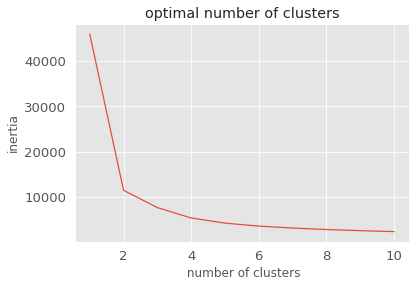

In [337]:
X = data_interest.values[:,0:3]
X = np.nan_to_num(X)
#Clus_dataSet = StandardScaler().fit_transform(X)

Clus_dataSet=X


wccs = []
for i in range(1,11):
  k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12,random_state=10)
  k_means.fit(Clus_dataSet)
  wccs.append(k_means.inertia_)
wccs

plt.plot(range(1,11),wccs)
plt.title("optimal number of clusters")
plt.xlabel(" number of clusters")
plt.ylabel("inertia")
plt.savefig("elbow technique 3 features")
plt.show()


In [338]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_

data_interest['cluster_3D'] = labels
data_interest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             6        2   
25005A012              2.376147  1.641558   10.137945             6        2   
25005A090              2.000000 -2.525230   10.137945             3        3   
25005A10-              2.436047  2.136560   10.125551             6        2   
25005A190              1.631579 -1.787012   10.137945             1        3   

           cluster_3D  
CD_SECTOR              
25005A001           0  
25005A012           0  
25005A090           1  
25005A10-           0  
25005A190           1

In [339]:
X.shape

(9665, 3)

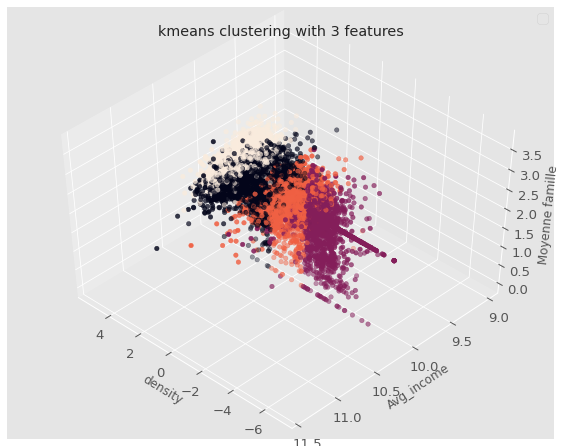

In [340]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('density')
ax.set_ylabel('Avg_income')
ax.set_zlabel('Moyenne famille')
ax.set_title("kmeans clustering with 3 features")
ax.legend(labels = [f'Cluster{i+1}' for i in range(0,4)])
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels.astype(np.float))
plt.savefig("kmeans clustering 3 features")

In [341]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_

data_interest['cluster_3D_2'] = labels
data_interest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             6        2   
25005A012              2.376147  1.641558   10.137945             6        2   
25005A090              2.000000 -2.525230   10.137945             3        3   
25005A10-              2.436047  2.136560   10.125551             6        2   
25005A190              1.631579 -1.787012   10.137945             1        3   

           cluster_3D  cluster_3D_2  
CD_SECTOR                            
25005A001           0             2  
25005A012           0             2  
25005A090           1             1  
25005A10-           0             2  
25005A190           1             1

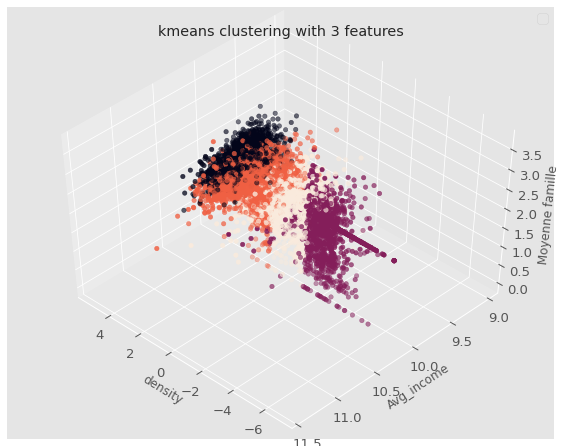

In [342]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('density')
ax.set_ylabel('Avg_income')
ax.set_zlabel('Moyenne famille')
ax.set_title("kmeans clustering with 3 features")
ax.legend(labels = [f'Cluster{i+1}' for i in range(0,4)])
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels.astype(np.float))
plt.savefig("kmeans clustering 3 features 4 clusters 3D")

In [343]:
d_centroids_df = data_interest.groupby('cluster_3D')['density','Avg_income','Moy pers par menages'].mean()
d_centroids_density = list(d_centroids_df['density'])
d_centroids_income = list(d_centroids_df['Avg_income'])
d_centroids_menages = list(d_centroids_df['Moy pers par menages'])
d_centroids_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


density  Avg_income  Moy pers par menages
cluster_3D                                            
0           1.946387   10.103332              2.063725
1          -2.598298   10.123265              1.824998
2          -0.549393   10.139055              2.044379
3           3.258288    9.964349              2.084489

In [344]:
d2_centroids_df = data_interest.groupby('cluster_3D_2')['density','Avg_income','Moy pers par menages'].mean()
d2_centroids_density = list(d_centroids_df['density'])
d2_centroids_income = list(d_centroids_df['Avg_income'])
d2_centroids_menages = list(d_centroids_df['Moy pers par menages'])
d2_centroids_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


density  Avg_income  Moy pers par menages
cluster_3D_2                                            
0             3.250672    9.966512              2.085597
1            -2.609431   10.123613              1.824027
2             1.939374   10.102935              2.062619
3            -0.561851   10.138853              2.043653

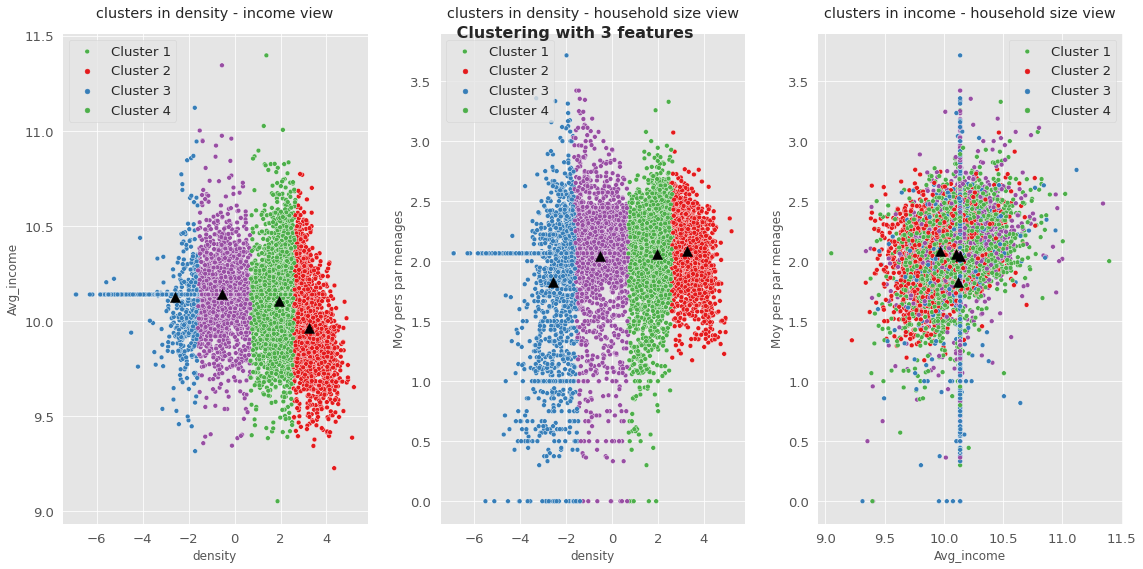

In [345]:
fig2,axes = plt.subplots(1,3,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_3D_2'
                  ,palette = 'Set1',ax = axes[0])
axes[0].scatter(d2_centroids_density,d2_centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('clusters in density - income view',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])

axes[1] = sns.scatterplot(data=data_interest,x='density',y = 'Moy pers par menages',hue='cluster_3D_2'
                  ,palette = 'Set1',ax = axes[1])
axes[1].scatter(d2_centroids_density,d2_centroids_menages,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[1].set_title('clusters in density - household size view',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))

axes[2] = sns.scatterplot(data=data_interest,x='Avg_income',y = 'Moy pers par menages',hue='cluster_3D_2'
                  ,palette = 'Set1',ax = axes[2])
axes[2].scatter(d2_centroids_income,d2_centroids_menages,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[2].set_title('clusters in income - household size view',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[2].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))



plt.tight_layout()
plt.suptitle(" \n Clustering with 3 features",fontsize = 16,fontweight='semibold')
plt.savefig("3 features kmeans on 3 views")
plt.show()

In [346]:
#plt.figure(figsize=(8,8))

#ax = sns.scatterplot(data=data_2.iloc[1:1000],x='density',y = 'Avg_income',hue='Segment'
 #                 ,palette = 'Set1')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.show()

### visualizing a number of 4 clusters and comparing

In [347]:
data_interest.head()

Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             6        2   
25005A012              2.376147  1.641558   10.137945             6        2   
25005A090              2.000000 -2.525230   10.137945             3        3   
25005A10-              2.436047  2.136560   10.125551             6        2   
25005A190              1.631579 -1.787012   10.137945             1        3   

           cluster_3D  cluster_3D_2  
CD_SECTOR                            
25005A001           0             2  
25005A012           0             2  
25005A090           1             1  
25005A10-           0             2  
25005A190           1             1

In [348]:
X = data_interest.values[:,1:3]
X = np.nan_to_num(X)
#Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet=X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


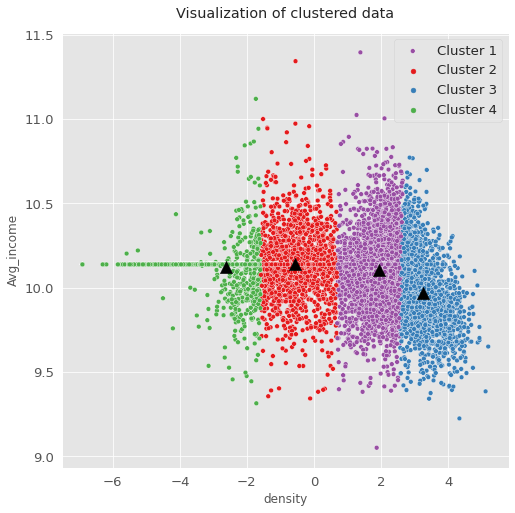

In [349]:
fig,ax = plt.subplots(1,figsize = (8,8))
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12,random_state=10)
k_means.fit(Clus_dataSet)
y_predict = k_means.labels_
centroids = k_means.cluster_centers_
data_interest['Test_cluster'] = y_predict
centroids_df = data_interest.groupby('Test_cluster')['density','Avg_income'].mean()
centroids_density = list(centroids_df['density'])
centroids_income = list(centroids_df['Avg_income'])
ax = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='Test_cluster'
                  ,palette = 'Set1')

#ax.scatter(data_interest['density'],data_interest['Avg_income'],c=y_predict,s=10)
ax.scatter(centroids_density,centroids_income,marker = '^',c='black',s=150)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
ax.set_title('Visualization of clustered data',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("4 clusters")
plt.show()

#### clusters centers

In [350]:
centroids_df

density  Avg_income
Test_cluster                      
0            -0.561734   10.139200
1             3.251749    9.966037
2            -2.609870   10.123182
3             1.939420   10.103112

In [351]:
data_interest.head()

Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             3        2   
25005A012              2.376147  1.641558   10.137945             3        2   
25005A090              2.000000 -2.525230   10.137945             2        3   
25005A10-              2.436047  2.136560   10.125551             3        2   
25005A190              1.631579 -1.787012   10.137945             2        3   

           cluster_3D  cluster_3D_2  
CD_SECTOR                            
25005A001           0             2  
25005A012           0             2  
25005A090           1             1  
25005A10-           0             2  
25005A190           1             1

In [352]:
data_interest.to_csv("data_interest.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


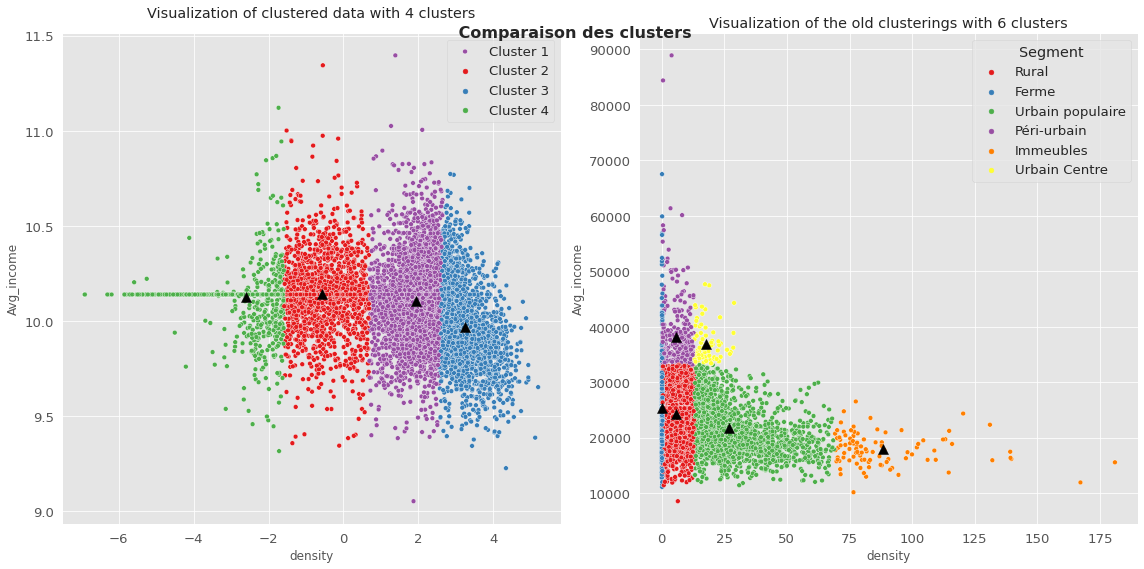

In [353]:
fig2,axes = plt.subplots(1,2,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='Test_cluster'
                  ,palette = 'Set1',ax = axes[0])
axes[0].scatter(centroids_density,centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('Visualization of clustered data with 4 clusters',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
axes[1] =sns.scatterplot(data=data_2,x='density',y = 'Avg_income',hue='Segment'
                  ,palette = 'Set1',ax=axes[1])
#ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('Visualization of the old clusterings with 6 clusters')
old_centroids_df = data_2.groupby('Segment')['density','Avg_income'].mean()
old_centroids_density = list(old_centroids_df['density'])
old_centroids_income = list(old_centroids_df['Avg_income'])
axes[1].scatter(old_centroids_density,old_centroids_income,marker = '^',c='black',s=100)
#plt.legend(labels = [i for i in range(0,4)],loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(" \n Comparaison des clusters",fontsize = 16,fontweight='semibold')
plt.savefig("4 vs 6(old) clusters kmeans")
plt.show()

In [354]:
data_interest.groupby('Test_cluster').count().reset_index()

Test_cluster  Moy pers par menages  density  Avg_income  cluster  \
0             0                  1993     1993        1993     1993   
1             1                  2386     2386        2386     2386   
2             2                  1566     1566        1566     1566   
3             3                  3720     3720        3720     3720   

   cluster_3D  cluster_3D_2  
0        1993          1993  
1        2386          2386  
2        1566          1566  
3        3720          3720

### Hierarchical clustering

In [355]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         0.35091955 4.47794528 ... 0.77260447 2.12399807 5.09717151]
 [0.35091955 0.         4.16678746 ... 0.44608099 1.80933118 4.78639767]
 [4.47794528 4.16678746 0.         ... 3.72070647 2.35745628 0.61961021]
 ...
 [0.77260447 0.44608099 3.72070647 ... 0.         1.3632502  4.34031669]
 [2.12399807 1.80933118 2.35745628 ... 1.3632502  0.         2.97706649]
 [5.09717151 4.78639767 0.61961021 ... 4.34031669 2.97706649 0.        ]]


In [356]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 


In [357]:

import pylab
#Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
#Zw_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

In [358]:
fig = pylab.figure(figsize=(18,50))
#def llf(id):
#    return data_interest.loc[id]
    
#dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<Figure size 1296x3600 with 0 Axes>

In [359]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(dist_matrix)

agglom2 = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
agglom2.fit(dist_matrix)

#agglom.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering(n_clusters=4)

In [360]:
data_interest['cluster_hierarchical'] = agglom.labels_
data_interest['cluster_hierarchical_ward'] = agglom2.labels_
data_interest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             3        2   
25005A012              2.376147  1.641558   10.137945             3        2   
25005A090              2.000000 -2.525230   10.137945             2        3   
25005A10-              2.436047  2.136560   10.125551             3        2   
25005A190              1.631579 -1.787012   10.137945             2        3   

           cluster_3D  cluster_3D_2  cluster_hierarchical  \
CD_SECTOR                                                   
25005A001           0             2                     2   
25005A012           0             2                     2   
25005A090           1             1                     0   
25005A10-           0             2                     2   
25005A190           1             1                     0   

           cluster_hierarchical_ward  
CD_SECTOR                             
25005A001                          1  
25005A012                          1  
25005A090                          0  
25005A10-                          1  
25005A190                          0

In [361]:
data_interest['cluster_hierarchical'].unique()

array([2, 0, 1, 3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


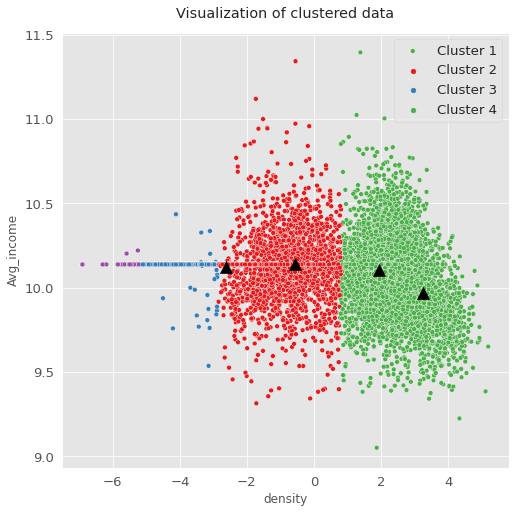

In [362]:
fig,ax = plt.subplots(1,figsize = (8,8))
dendo_centroids_df = data_interest.groupby('cluster_hierarchical')['density','Avg_income'].mean()
dendo_centroids_density = list(centroids_df['density'])
dendo_centroids_income = list(centroids_df['Avg_income'])
ax = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_hierarchical'
                  ,palette = 'Set1')

#ax.scatter(data_interest['density'],data_interest['Avg_income'],c=y_predict,s=10)
ax.scatter(dendo_centroids_density,dendo_centroids_income,marker = '^',c='black',s=150)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
ax.set_title('Visualization of clustered data',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


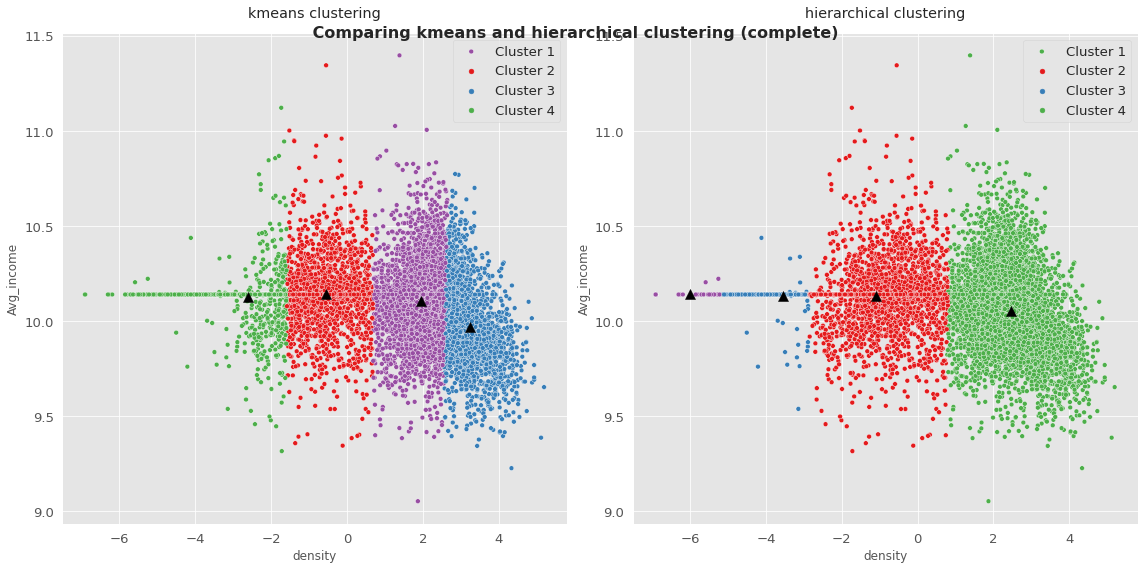

In [363]:
fig2,axes = plt.subplots(1,2,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='Test_cluster'
                  ,palette = 'Set1',ax = axes[0])
axes[0].scatter(centroids_density,centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('kmeans clustering',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
axes[1] =sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_hierarchical'
                  ,palette = 'Set1',ax=axes[1])
#ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('hierarchical clustering', y = 1.02)
dendo_centroids_df = data_interest.groupby('cluster_hierarchical')['density','Avg_income'].mean()
dendo_centroids_density = list(dendo_centroids_df['density'])
dendo_centroids_income = list(dendo_centroids_df['Avg_income'])
axes[1].scatter(dendo_centroids_density,dendo_centroids_income,marker = '^',c='black',s=100)
axes[1].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(" \n Comparing kmeans and hierarchical clustering (complete)",fontsize = 16,fontweight='semibold')
plt.savefig("complete vs kmeans")

In [364]:
from sklearn.cluster import DBSCAN 
epsilon = 0.1
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Clus_dataSet)
labels_scan = db.labels_
labels_scan

array([0, 0, 0, ..., 0, 0, 0])

In [365]:
n_clusters_ = len(set(labels_scan)) - (1 if -1 in labels else 0)
n_clusters_

3

In [366]:
set(labels_scan)

{-1, 0, 1}

In [367]:
data_interest['clusters_db_scan'] = labels_scan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [368]:
data_interest.head()

Moy pers par menages   density  Avg_income  Test_cluster  cluster  \
CD_SECTOR                                                                      
25005A001              2.441926  1.949557   10.306115             3        2   
25005A012              2.376147  1.641558   10.137945             3        2   
25005A090              2.000000 -2.525230   10.137945             2        3   
25005A10-              2.436047  2.136560   10.125551             3        2   
25005A190              1.631579 -1.787012   10.137945             2        3   

           cluster_3D  cluster_3D_2  cluster_hierarchical  \
CD_SECTOR                                                   
25005A001           0             2                     2   
25005A012           0             2                     2   
25005A090           1             1                     0   
25005A10-           0             2                     2   
25005A190           1             1                     0   

           cluster_hierarchical_ward  clusters_db_scan  
CD_SECTOR                                               
25005A001                          1                 0  
25005A012                          1                 0  
25005A090                          0                 0  
25005A10-                          1                 0  
25005A190                          0                 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Text(0.5, 0.98, ' Comparing kmeans and DB scan')

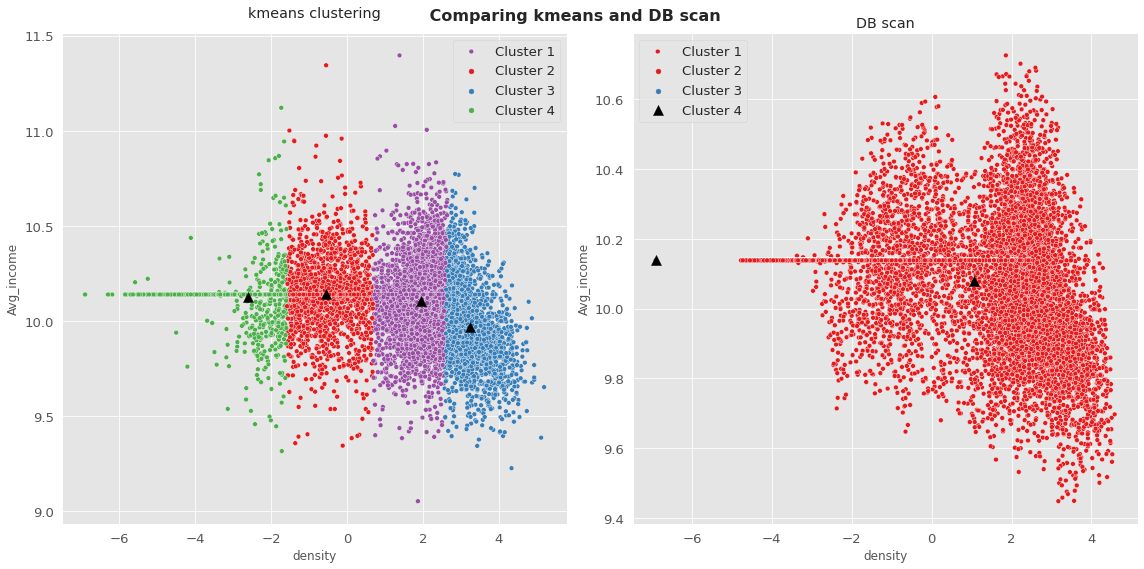

In [369]:
fig2,axes = plt.subplots(1,2,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='Test_cluster'
                  ,palette = 'Set1',ax = axes[0])
axes[0].scatter(centroids_density,centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('kmeans clustering',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
data_to_plot = data_interest[data_interest['clusters_db_scan'] != -1]
axes[1] =sns.scatterplot(data=data_to_plot,x='density',y = 'Avg_income',hue='clusters_db_scan'
                  ,palette = 'Set1',ax=axes[1])
#ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('DB scan')
db_centroids_df = data_to_plot.groupby('clusters_db_scan')['density','Avg_income'].mean()
db_centroids_density = list(db_centroids_df['density'])
db_centroids_income = list(db_centroids_df['Avg_income'])
axes[1].scatter(db_centroids_density,db_centroids_income,marker = '^',c='black',s=100)
axes[1].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(" Comparing kmeans and DB scan",fontsize = 16,fontweight='semibold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


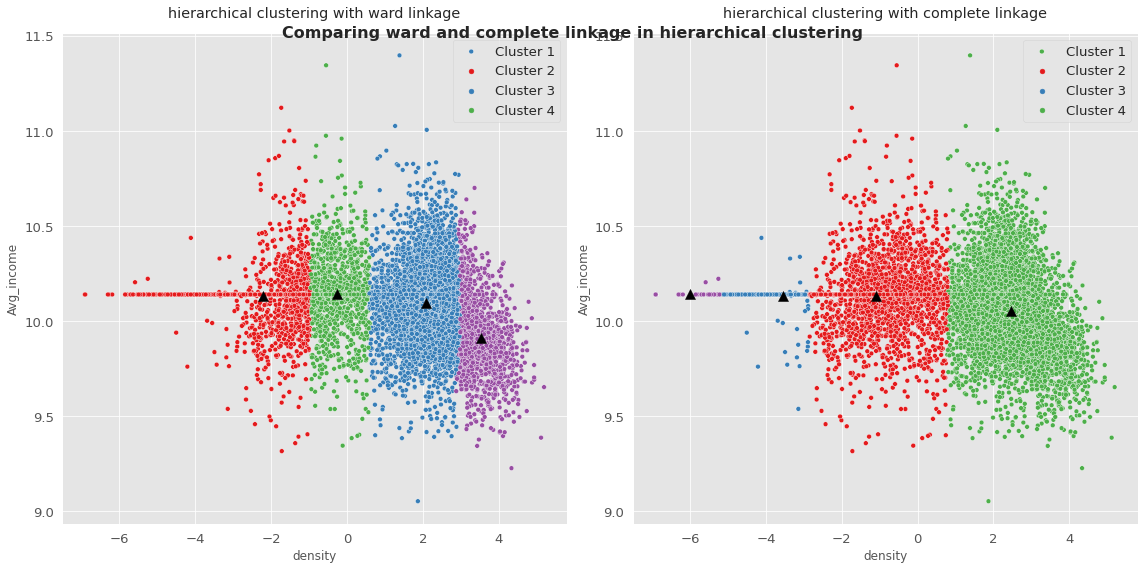

In [370]:
fig2,axes = plt.subplots(1,2,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_hierarchical_ward'
                  ,palette = 'Set1',ax = axes[0])
ward_dendo_centroids_df = data_interest.groupby('cluster_hierarchical_ward')['density','Avg_income'].mean()
ward_dendo_centroids_density = list(ward_dendo_centroids_df['density'])
ward_dendo_centroids_income = list(ward_dendo_centroids_df['Avg_income'])
axes[0].scatter(ward_dendo_centroids_density,ward_dendo_centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('hierarchical clustering with ward linkage',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
axes[1] =sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_hierarchical'
                  ,palette = 'Set1',ax=axes[1])
#ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('hierarchical clustering with complete linkage',y=1.02)
dendo_centroids_df = data_interest.groupby('cluster_hierarchical')['density','Avg_income'].mean()
dendo_centroids_density = list(dendo_centroids_df['density'])
dendo_centroids_income = list(dendo_centroids_df['Avg_income'])
axes[1].scatter(dendo_centroids_density,dendo_centroids_income,marker = '^',c='black',s=100)
new_labels = [f'Cluster {i+1}' for i in range(0,4)]
axes[1].legend(labels = new_labels)
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(" \nComparing ward and complete linkage in hierarchical clustering",fontsize = 16,fontweight='semibold')
plt.savefig("ward vs complete linkage")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


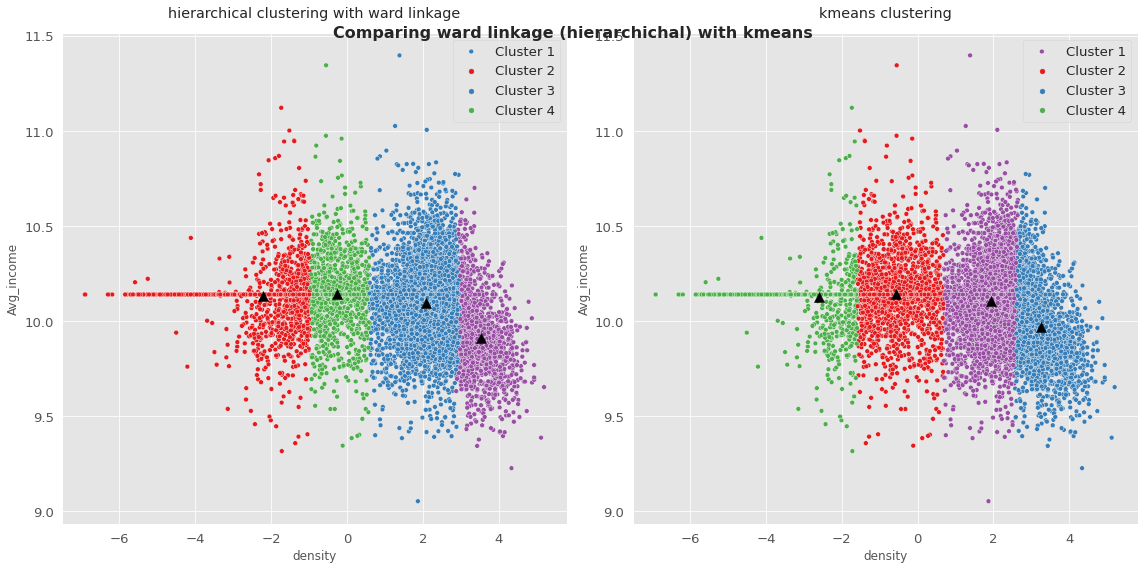

In [371]:
fig2,axes = plt.subplots(1,2,figsize = (16,8))


axes[0] = sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='cluster_hierarchical_ward'
                  ,palette = 'Set1',ax = axes[0])
ward_dendo_centroids_df = data_interest.groupby('cluster_hierarchical_ward')['density','Avg_income'].mean()
ward_dendo_centroids_density = list(ward_dendo_centroids_df['density'])
ward_dendo_centroids_income = list(ward_dendo_centroids_df['Avg_income'])
axes[0].scatter(ward_dendo_centroids_density,ward_dendo_centroids_income,marker = '^',c='black',s=100)
#ax.set_xlabel('density')
#ax.set_ylabel('Average income')
axes[0].set_title('hierarchical clustering with ward linkage',y = 1.02)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].legend(labels = [f'Cluster {i+1}' for i in range(0,4)])
axes[1] =sns.scatterplot(data=data_interest,x='density',y = 'Avg_income',hue='Test_cluster'
                  ,palette = 'Set1',ax=axes[1])
#ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('kmeans clustering',y=1.02)
#dendo_centroids_df = data_interest.groupby('cluster_hierarchical')['density','Avg_income'].mean()
#dendo_centroids_density = list(dendo_centroids_df['density'])
#dendo_centroids_income = list(dendo_centroids_df['Avg_income'])
axes[1].scatter(centroids_density,centroids_income,marker = '^',c='black',s=100)
new_labels = [f'Cluster {i+1}' for i in range(0,4)]
axes[1].legend(labels = new_labels)
#plt.legend(labels = [i for i in range(0,5)],loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(" \nComparing ward linkage (hierarchichal) with kmeans",fontsize = 16,fontweight='semibold')
plt.savefig("ward linkage vs kmeans")

#### ward centroid

In [372]:
ward_dendo_centroids_df

density  Avg_income
cluster_hierarchical_ward                      
0                         -2.216340   10.128796
1                          2.080290   10.095441
2                         -0.250457   10.139903
3                          3.524116    9.910701

#### Mapping clusters on a map

In [373]:
pip install descartes

In [374]:
pip install geopandas

In [375]:
import descartes
import geopandas as gpd

In [376]:
sectors = gpd.read_file("sh_statbel.shp")
sectors.plot()

DriverError: ignored

In [ ]:
sectors.plot(color = "red",edgecolor = "black")

In [ ]:
sectors.head()

In [ ]:
sectors.columns

In [ ]:
import json

In [ ]:
belgique = json.load(open("sh_statbel_statistical_sectors_20210101.geojson","r"))

In [ ]:
sectors = gpd.read_file("sh_statbel_statistical_sectors_20210101.shp")

In [ ]:
sectors.head()

In [ ]:
data_interest.head()
data_interest['secteur'] = data_interest.index
data_interest.head()

In [ ]:
sectors['secteur'] = sectors['CS01012021']    

In [ ]:
sectors.head()

In [ ]:
data_2 = pd.merge(data, df, on='CD_SECTOR',  how='left')

In [ ]:
type(sectors)

In [ ]:
belgium_total = sectors.merge(data_interest, on='secteur')
belgium_total.head()

In [ ]:
sectors.plot(cmap = 'jet', column= 'T_SEC_NL',figsize = (10,8),alpha=1)

In [ ]:
belgium_total.plot(cmap = 'jet', column= 'T_SEC_NL',figsize = (10,8),alpha=1)

In [ ]:
!pip install mapclassify
import mapclassify

In [ ]:
fig,ax = plt.subplots(1,figsize = (10,8))
belgium_total.plot(scheme ='EqualInterval',k = 5,column='Test_cluster',legend = True,
                   alpha=1,ax = ax)
ax.axis('off')
plt.legend()
plt.savefig(" map 2 features without legend")
#ax.legend(loc = 'upper right',anchor_box=(1,1))


In [ ]:
fig,ax = plt.subplots(1,figsize = (10,8))
belgium_total.plot(scheme ='EqualInterval',k = 5,column='Test_cluster',legend = True,
                   alpha=1,ax = ax)
ax.axis('off')
#plt.legend()
plt.savefig(" map 2 features with legend")
#ax.legend(loc = 'upper right',anchor_box=(1,1))

In [ ]:
fig,ax = plt.subplots(1,figsize = (10,8))
belgium_total.plot(scheme ='EqualInterval',k = 5,column='cluster_3D_2',legend = True,
                   alpha=1,ax = ax)
ax.axis('off')
plt.legend()
plt.savefig(" map 3 features without legend")
#ax.legend(loc = 'upper right',anchor_box=(1,1))


In [ ]:
fig,ax = plt.subplots(1,figsize = (10,8))
belgium_total.plot(scheme ='EqualInterval',k = 5,column='cluster_3D_2',legend = True,
                   alpha=1,ax = ax)
ax.axis('off')
#plt.legend()
plt.savefig(" map 3 features with legend")
#ax.legend(loc = 'upper right',anchor_box=(1,1))

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,axes = plt.subplots(figsize = (7,7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size = "7%",pad = 0.1)
belgium_total.plot(cmap = 'jet',column='Test_cluster',legend = True,
                   legend_kwds = {'label':'Cluster'},alpha=1,ax=axes,cax=cax)

In [ ]:
crs = belgium_total.crs
crs